In [1]:
import pandas as pd
import numpy as np

In [2]:
#load the file 
df=pd.read_csv('train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
# Cleaning the Dataset

In [5]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
#Dropping unnecessary columns
df.drop(columns=['Cabin'], inplace=True,errors='ignore') #As this column has more missing values
df.drop(columns=['Ticket'], inplace=True,errors='ignore') #As this column is not useful
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [7]:
#replacing missing values in Age column with mean
df['Age']=df['Age'].fillna(df['Age'].median())
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [8]:
#Encoding gender into 1 and 0
df['Sex'] = df['Sex'].map({'male':1, 'female':0})

In [9]:
#forward filling values in column Embarked
df['Embarked'] = df['Embarked'].ffill()
df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.0000,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,23.4500,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,30.0000,0


In [10]:
print(df.isnull().sum())
df

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,13.0000,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.0000,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,23.4500,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,30.0000,0


In [11]:
print(df['SibSp'].value_counts()) #Siblings/Spouses

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


In [12]:
print(df['Parch'].value_counts()) #Parents/Children

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


In [13]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0,2
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,13.0000,2,1
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.0000,2,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,23.4500,2,4
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,30.0000,0,1


In [20]:
clean=df
clean.to_csv("cleaned.csv", index=False)

print("Submission file created successfully: cleaned.csv")


Submission file created successfully: cleaned.csv


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
#Total no. of Survived and Not Survivied

<Axes: title={'center': 'Total no. of Survived and Not Survivied'}, xlabel='Survived', ylabel='count'>

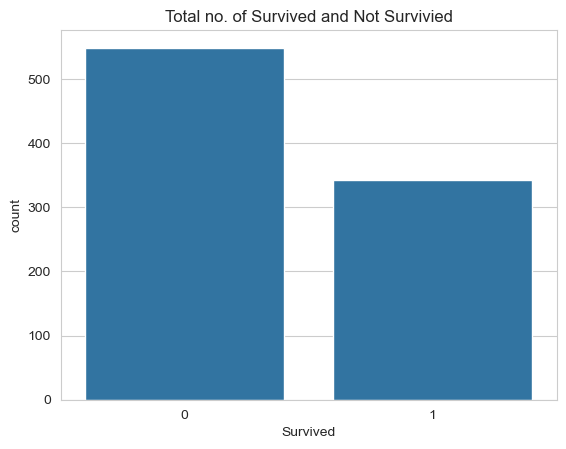

In [16]:
sns.set_style('whitegrid')
plt.title('Total no. of Survived and Not Survivied')
sns.countplot(x='Survived',data=df)

<Axes: title={'center': 'Total no. of Survived and Not Survivied'}, xlabel='Survived', ylabel='count'>

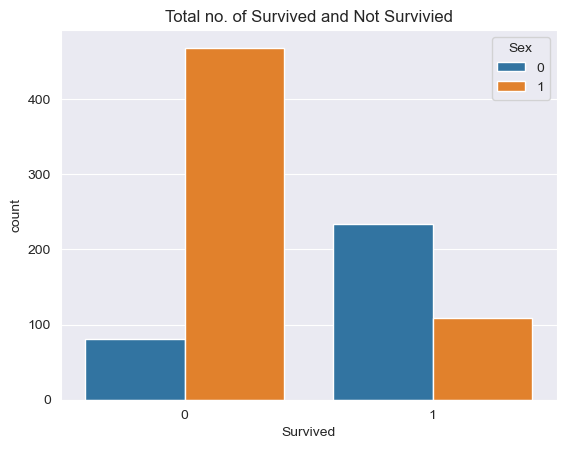

In [17]:
sns.set_style('darkgrid')
plt.title('Total no. of Survived and Not Survivied')
sns.countplot(x='Survived',hue='Sex',data=df)

In [206]:
#Survival by Passenger Class

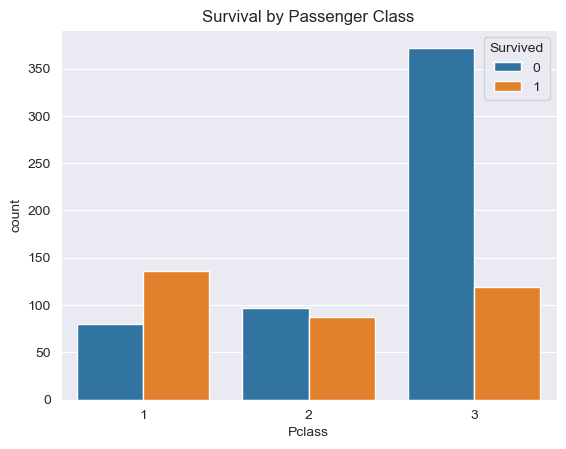

In [239]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Survival by Passenger Class")
plt.show()

<Axes: title={'center': 'Total no. of Survived according to Embarked'}, xlabel='Survived', ylabel='count'>

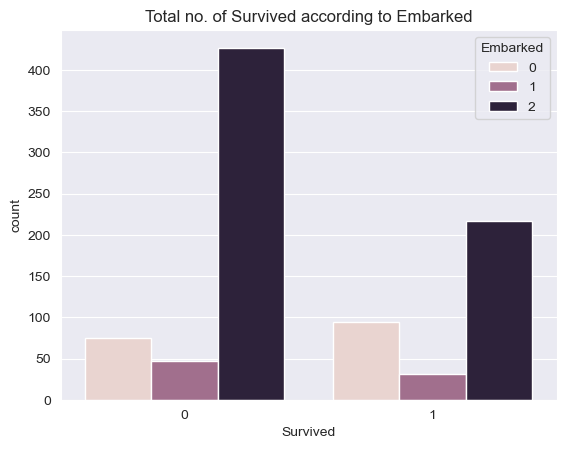

In [242]:
sns.set_style('darkgrid')
plt.title('Total no. of Survived according to Embarked')
sns.countplot(x='Survived',hue='Embarked',data=df)

In [243]:
#Here it is obesrved that the passangers of CLASS 1 had survived most and passengers of CLASS 3 had not survived most

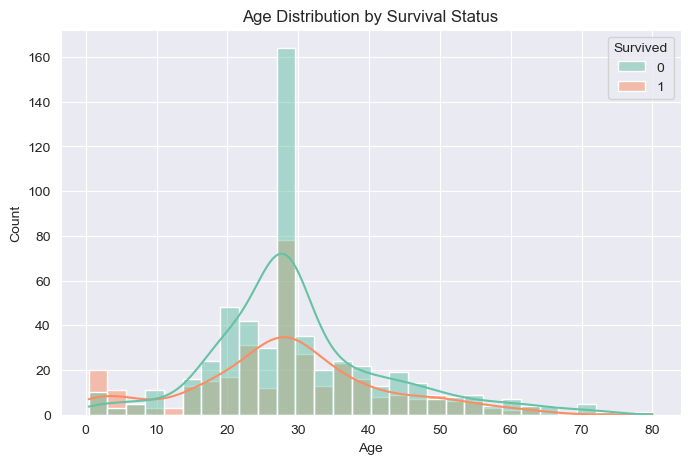

In [244]:
# . Age Distribution by Survival
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True, palette='Set2')
plt.title("Age Distribution by Survival Status")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

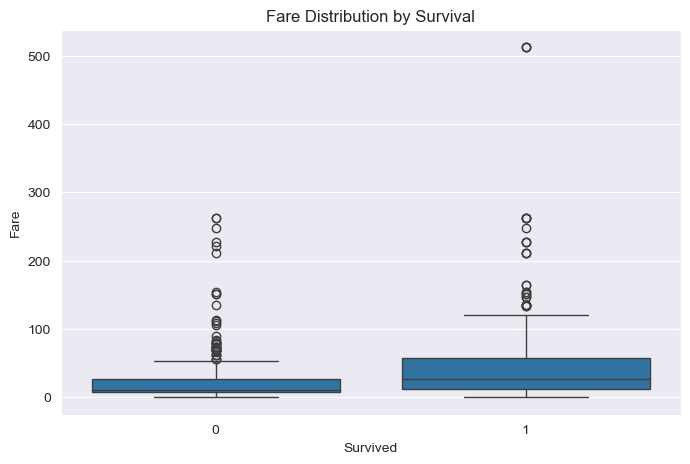

In [245]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare Distribution by Survival")
plt.show()


<Axes: xlabel='AgeGroup', ylabel='count'>

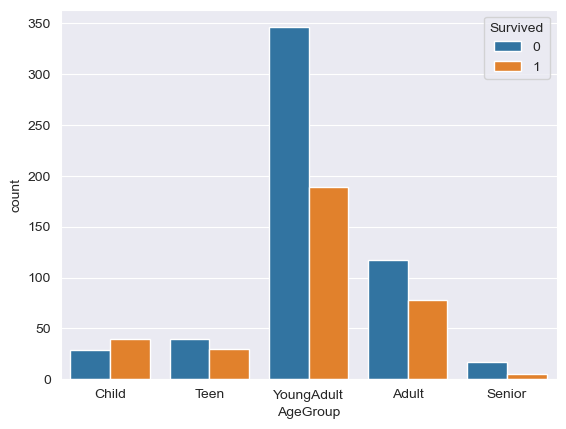

In [246]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0,12,18,35,60,80], labels=['Child','Teen','YoungAdult','Adult','Senior'])
sns.countplot(x='AgeGroup', hue='Survived', data=df)


<Axes: xlabel='FareGroup', ylabel='count'>

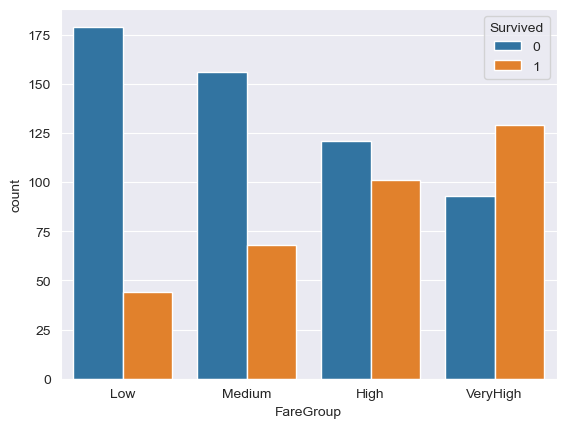

In [247]:
df['FareGroup'] = pd.qcut(df['Fare'], 4, labels=['Low','Medium','High','VeryHigh'])
sns.countplot(x='FareGroup', hue='Survived', data=df)

In [248]:
pd.crosstab(df['Pclass'], df['Sex'], values=df['Survived'], aggfunc='mean')

Sex,0,1
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


In [249]:
numeric_df = df.select_dtypes(include=['int64','float64'])

# Correlation with target
corr_with_survived = numeric_df.corr()['Survived'].sort_values(ascending=False)
print(corr_with_survived)


Survived       1.000000
Fare           0.257307
Parch          0.081629
FamilySize     0.016639
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.064910
Embarked      -0.172726
Pclass        -0.338481
Sex           -0.543351
Name: Survived, dtype: float64


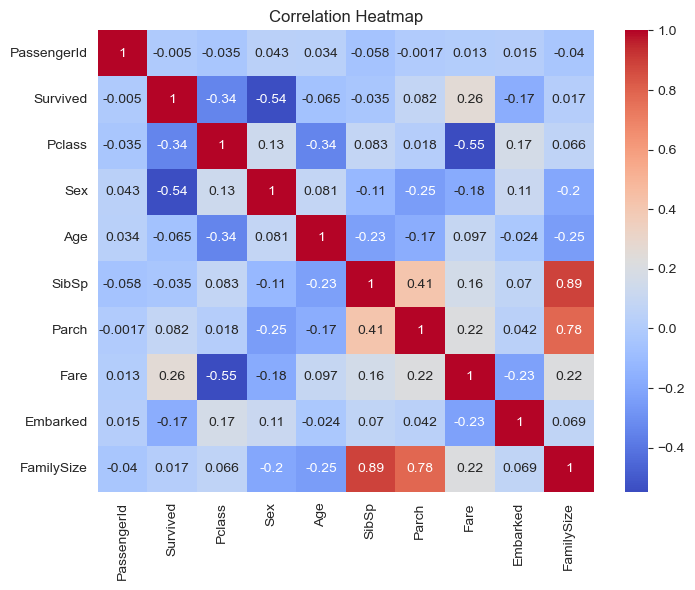

In [250]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [251]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,AgeGroup,FareGroup
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,2,2,YoungAdult,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,0,2,Adult,VeryHigh
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,2,1,YoungAdult,Medium
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,2,2,YoungAdult,VeryHigh
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,2,1,YoungAdult,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,13.0000,2,1,YoungAdult,Medium
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.0000,2,1,YoungAdult,High
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,28.0,1,2,23.4500,2,4,YoungAdult,High
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,30.0000,0,1,YoungAdult,High


In [252]:
from sklearn.model_selection import train_test_split
X = df.drop(['Survived','Name','AgeGroup','FareGroup'], axis=1)
y = df['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [263]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_val)
print("Gradient Boosting Accuracy:", accuracy_score(y_val, y_pred_gb))
print(classification_report(y_val, y_pred_gb))


Gradient Boosting Accuracy: 0.8100558659217877
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       105
           1       0.79      0.73      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



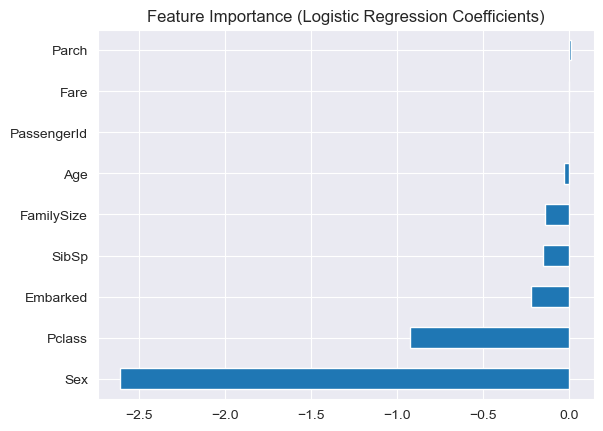

In [266]:
# Get coefficients
coefficients = pd.Series(model.coef_[0], index=X_train.columns)
# Sort and plot
coefficients.sort_values().plot(kind='barh')
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.show()


In [268]:
test_df = pd.read_csv("test.csv")
test_df 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [269]:
print(test_df.isnull().sum())

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [270]:
#Dropping unnecessary columns
test_df.drop(columns=['Cabin'], inplace=True,errors='ignore') #As this column has more missing values
test_df.drop(columns=['Ticket'], inplace=True,errors='ignore') #As this column is not useful
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S


In [271]:
#Encoding gender into 1 and 0
test_df['Sex'] = test_df['Sex'].map({'male':1, 'female':0})
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,NaN,0,0,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,7.2500,S
416,1308,3,"Ware, Mr. Frederick",1,NaN,0,0,8.0500,S


In [272]:
#replacing missing values in Age column with mean
test_df['Age']=test_df['Age'].fillna(df['Age'].median())
test_df['Fare']=test_df['Fare'].fillna(df['Age'].median())
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,28.0,0,0,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,7.2500,S
416,1308,3,"Ware, Mr. Frederick",1,28.0,0,0,8.0500,S


In [273]:
#forward filling values in column Embarked
test_df['Embarked'] = test_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,28.0,0,0,8.0500,2
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,108.9000,0
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,7.2500,2
416,1308,3,"Ware, Mr. Frederick",1,28.0,0,0,8.0500,2


In [274]:
print(test_df.isnull().sum())
test_df

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,2
...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,28.0,0,0,8.0500,2
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,108.9000,0
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,7.2500,2
416,1308,3,"Ware, Mr. Frederick",1,28.0,0,0,8.0500,2


In [275]:
test_df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,1,2
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,2,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,1,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,2,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,2,1
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,28.0,0,0,8.0500,2,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,108.9000,0,1
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,7.2500,2,1
416,1308,3,"Ware, Mr. Frederick",1,28.0,0,0,8.0500,2,3


In [280]:
# Define final features once
final_features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'SibSp', 'Parch']

# Training set
X = df[final_features]
y = df['Survived']

# Test set (after applying same preprocessing steps!)
X_test = test_df[final_features]


In [285]:
from sklearn.ensemble import GradientBoostingClassifier

# 1. Train Gradient Boosting on full training data
final_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)
final_model.fit(X, y)   # X and y should be the full training data (not just X_train, y_train split)



GradientBoostingClassifier(n_estimators=200, random_state=42)

In [287]:
# 2. Predict on test.csv (after preprocessing test_df into X_test)
y_pred = final_model.predict(X_test)
y_pred


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [288]:
# 3. Create submission file
submission = pd.DataFrame({
    "PassengerId": test_df["PassengerId"],
    "Survived": y_pred
})

submission.to_csv("submission.csv", index=False)

print("Submission file created successfully: submission.csv")


Submission file created successfully: submission.csv


In [289]:
submission.to_csv("submission.csv", index=False)


In [292]:
a=pd.read_csv('submission.csv')
a

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
